In [46]:
import os
import random

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import sklearn.model_selection
import sklearn.svm
import tensorflow as tf
import matplotlib.pyplot as plt

import landmarks

random.seed(0)

# Task A1
Gender detection: male or female.

Import raw data.

a1_X_train_raw, a1_y_train_raw = landmarks.extract_features_labels("celeba")
a1_X_test_raw, a1_y_test_raw = landmarks.extract_features_labels("celeba_test")

Convert raw data into Pandas DataFrames, then split train set into train set and validation set.

In [5]:
# gender == 0 means female
a1_X_labels = np.array([(f"x_{i}", f"y_{i}") for i in range(68)]).flatten()

a1_X_train = pd.DataFrame(data=a1_X_train_raw.reshape(a1_X_train_raw.shape[0], -1), columns=a1_X_labels)
a1_y_train = pd.DataFrame(data=a1_y_train_raw, columns=["image_name", "gender", "smiling"])

a1_X_train, a1_X_validation, a1_y_train, a1_y_validation = sklearn.model_selection.train_test_split(a1_X_train, a1_y_train, train_size=0.75)

a1_X_test = pd.DataFrame(data=a1_X_test_raw.reshape(a1_X_test_raw.shape[0], -1), columns=a1_X_labels)
a1_y_test = pd.DataFrame(data=a1_y_test_raw, columns=["image_name", "gender", "smiling"])

Train and test the model.

In [6]:
a1_model = sklearn.svm.SVC(kernel="linear")

a1_model.fit(a1_X_train, a1_y_train["gender"])

sklearn.metrics.accuracy_score(a1_y_validation["gender"], a1_model.predict(a1_X_validation))

0.9174311926605505

# Task A2
Emotion detection: smiling or not smiling.

Import raw data.

In [7]:
a2_X_train_raw, a2_y_train_raw = landmarks.extract_features_labels("celeba")
a2_X_test_raw, a2_y_test_raw = landmarks.extract_features_labels("celeba_test")

Convert raw data into Pandas DataFrames, then split train set into train set and validation set.

In [8]:
# gender == 0 means female
a2_X_labels = np.array([(f"x_{i}", f"y_{i}") for i in range(68)]).flatten()

a2_X_train = pd.DataFrame(data=a2_X_train_raw.reshape(a2_X_train_raw.shape[0], -1), columns=a2_X_labels)
a2_y_train = pd.DataFrame(data=a2_y_train_raw, columns=["image_name", "gender", "smiling"])

a2_X_train, a2_X_validation, a2_y_train, a2_y_validation = sklearn.model_selection.train_test_split(a2_X_train, a2_y_train, train_size=0.75)

a2_X_test = pd.DataFrame(data=a2_X_test_raw.reshape(a2_X_test_raw.shape[0], -1), columns=a2_X_labels)
a2_y_test = pd.DataFrame(data=a2_y_test_raw, columns=["image_name", "gender", "smiling"])

Train and test the model.

In [9]:
a2_model = sklearn.svm.SVC(kernel="linear")

a2_model.fit(a2_X_train, a2_y_train["gender"])

sklearn.metrics.accuracy_score(a2_y_validation["gender"], a2_model.predict(a2_X_validation))

0.920767306088407

# Task B1
Face shape recognition: 5 types of face shapes

Import raw data.

b1_X_train_raw, b1_y_train_raw = landmarks.extract_features_labels("cartoon_set")
b1_X_test_raw, b1_y_test_raw = landmarks.extract_features_labels("cartoon_set_test")

Convert raw data into Pandas DataFrames, then split train set into train set and validation set.

In [21]:
b1_X_labels = np.array([(f"x_{i}", f"y_{i}") for i in range(68)]).flatten()

b1_X_train = pd.DataFrame(data=b1_X_train_raw.reshape(b1_X_train_raw.shape[0], -1), columns=b1_X_labels)
b1_y_train = pd.DataFrame(data=b1_y_train_raw, columns=["eye_color", "face_shape", "file_name"])

b1_X_train, b1_X_validation, b1_y_train, b1_y_validation = sklearn.model_selection.train_test_split(b1_X_train, b1_y_train, train_size=0.75)

b1_X_test = pd.DataFrame(data=b1_X_test_raw.reshape(b1_X_test_raw.shape[0], -1), columns=b1_X_labels)
b1_y_test = pd.DataFrame(data=b1_y_test_raw, columns=["eye_color", "face_shape", "file_name"])

Train and test the model.

In [24]:
b1_model = sklearn.svm.SVC(kernel="linear")

b1_model.fit(b1_X_train, b1_y_train["face_shape"])

sklearn.metrics.accuracy_score(b1_y_validation["face_shape"], b1_model.predict(b1_X_validation))

0.7018057589067838

# Task B2
Eye color recognition: 5 types of eye colors

eye color label:<br>
0 - brown,<br>
1 - blue,<br>
2 - green,<br>
3 - bright green,<br>
4 - black.

We'll use CNNs here.

Load the data.

In [1]:
def load_images_and_labels(images_dirname):
    # get paths of images
    images_dir = os.path.join("./Datasets", images_dirname, "img")
    image_paths = sorted([os.path.join(images_dir, l) for l in os.listdir(images_dir)], key=lambda x: int(x.split(".")[1].split("/")[-1]))
    
    images = []
    for image_path in image_paths:
        image = tf.keras.preprocessing.image.img_to_array(
            tf.keras.preprocessing.image.load_img(
                image_path, target_size=None, interpolation="bicubic"
            )
        )
        images.append(image)
    images = np.array(images, dtype=int)

    # get labels
    labels_file = open(os.path.join("./Datasets", images_dirname, "labels.csv"), "r")
    lines = labels_file.readlines()
    labels_file.close()
    labels = []
    for line in lines[1:]:
        line = line.split()
        labels.append([int(line[1]), int(line[2]), line[3]])
    labels = np.array(labels)


    return images, labels

In [ ]:
b2_X_train_raw, b2_y_train_raw = load_images_and_labels("cartoon_set")
b2_X_test_raw, b2_y_test_raw = load_images_and_labels("cartoon_set_test")

Plot some images to verify correct import.

In [51]:
b2_X_train_raw[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [54]:
b2_y_train_raw[1]

array(['2', '4', '1.png'], dtype='<U21')

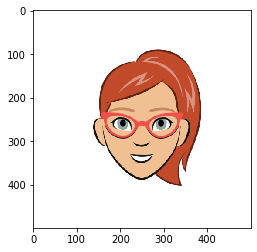

In [71]:
plt.figure()
plt.imshow(b2_X_train_raw[0].astype(np.int16), cmap=plt.cm.binary)

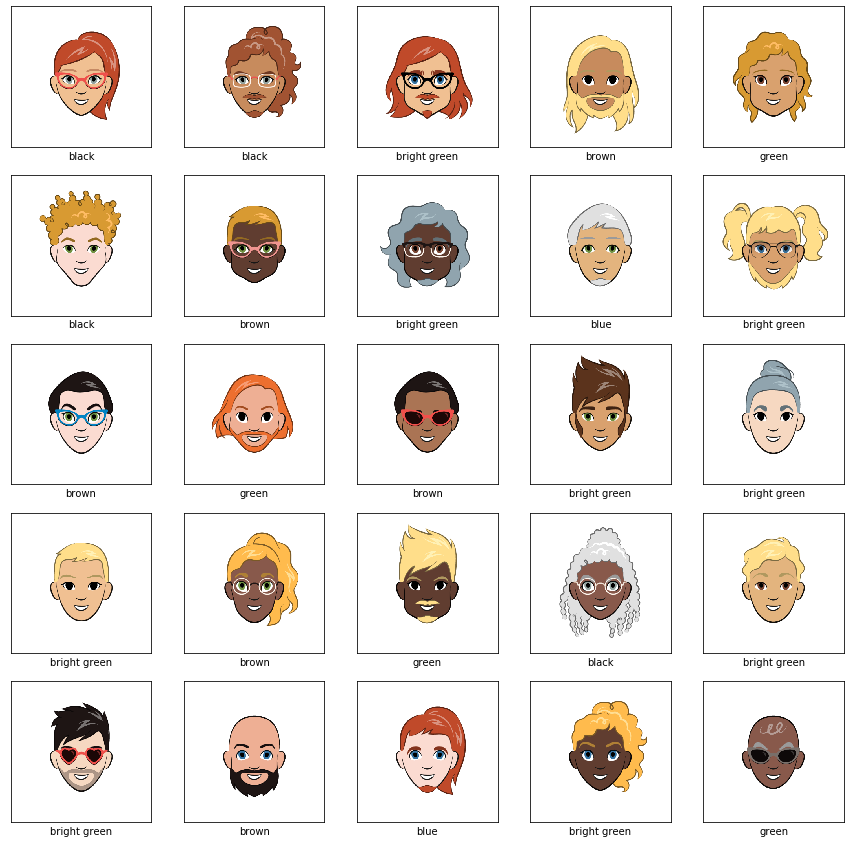

In [68]:
eye_color = {0: "brown", 1: "blue", 2: "green", 3: "bright green", 4: "black"}

plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(b2_X_train_raw[i].astype(np.int16), cmap=plt.cm.binary)
    plt.xlabel(eye_color[int(b2_y_train_raw[i][1])])
plt.show()

## Print out your results with following format

In [11]:
print(
    "TA1:{},{};TA2:{},{};TB1:{},{};TB2:{},{};".format(
        acc_A1_train,
        acc_A1_test,
        acc_A2_train,
        acc_A2_test,
        acc_B1_train,
        acc_B1_test,
        acc_B2_train,
        acc_B2_test,
    )
)

NameError: name 'acc_A1_train' is not defined